In [1]:
!apt-get install -y languagetool
!pip install -U language-check

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package languagetool
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for language-check
  Running setup.py clean for language-check
Failed to build language-check
ERROR: Could not build wheels for language-check, which is required to install pyproject.toml-based projects


In [2]:
!pip install --upgrade language-check

  Using cached language-check-1.1.tar.gz (33 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for language-check
  Running setup.py clean for language-check
Failed to build language-check
ERROR: Could not build wheels for language-check, which is required to install pyproject.toml-based projects


In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,_preprocess,TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import *
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv(r'medical_data.csv',low_memory=False)

In [5]:
data = data.drop_duplicates().reset_index().drop('index',axis = 1)

In [6]:
data

,Phrase,Prompt
0,When I remember her I feel down,Emotional pain
1,there is too much pain when i move my arm,Heart hurts
2,My son had his lip pierced and it is swollen a...,Infected wound
3,My muscles in my lower back are aching,Infected wound
4,i have muscle pain that my back\nI Have Muscle...,Foot ache
...,...,...
735,There is a feeling of emptiness creeping up to...,emotional pain
736,This weird pain under my chest has been growin...,internal pain
737,It is very hard to concentrate since the last ...,emotional pain
738,Walking to work seems difficult now and there ...,body feels weak


In [7]:
punctuation='["\'?,\.]' # I will replace all these punctuation with ''
abbr_dict={
    "what's":"what is",
    "what're":"what are",
    "where's":"where is",
    "where're":"where are",
    "i'm":"i am",
    "we're":"we are",
    "it's":"it is",
    "that's":"that is",
    "there's":"there is",
    "there're":"there are",
    "i've":"i have",
    "who've":"who have",
    "would've":"would have",
    "not've":"not have",
    "i'll":"i will",
    "it'll":"it will",
    "isn't":"is not",
    "wasn't":"was not",
    "aren't":"are not",
    "weren't":"were not",
    "can't":"can not",
    "couldn't":"could not",
    "don't":"do not",
    "didn't":"did not",
    "shouldn't":"should not",
    "wouldn't":"would not",
    "doesn't":"does not",
    "haven't":"have not",
    "hasn't":"has not",
    "hadn't":"had not",
    "won't":"will not",
    punctuation:'',
    '\s+':' ', # replace multi space with one single space
}

In [8]:
def process_data(data):
    # Convert to lower case

    data.Phrase=data.Phrase.str.lower()
    data.Prompt=data.Prompt.str.lower()
    # convert to string
    data.Phrase=data.Phrase.astype(str)
    data.Prompt=data.Prompt.astype(str)
    # replace abbreviations
    data.replace(abbr_dict,regex=True,inplace=True)

    #apply stemming
    stemmer = SnowballStemmer("english")
    data['stemmed_phrase'] = data['Phrase'].apply(lambda x : ' '.join([stemmer.stem(y) for y in x.split()]))
    display(data.head(10))
    return data

In [9]:
data = process_data(data)

,Phrase,Prompt,stemmed_phrase
0,when i remember her i feel down,emotional pain,when i rememb her i feel down
1,there is too much pain when i move my arm,heart hurts,there is too much pain when i move my arm
2,my son had his lip pierced and it is swollen a...,infected wound,my son had his lip pierc and it is swollen and...
3,my muscles in my lower back are aching,infected wound,my muscl in my lower back are ach
4,i have muscle pain that my back i have muscle ...,foot ache,i have muscl pain that my back i have muscl pa...
5,i have muscle pain in my left leg,shoulder pain,i have muscl pain in my left leg
6,i have cut my finger because of playing footba...,injury from sports,i have cut my finger becaus of play footbal an...
7,i have acne in my face and other problems in m...,skin issue,i have acn in my face and other problem in my ...
8,i have a strange rash on my arm,foot ache,i have a strang rash on my arm
9,i have a sharp pain in my lower stomach,stomach ache,i have a sharp pain in my lower stomach


In [10]:
d2 = data[['stemmed_phrase','Prompt']]

In [11]:
d2.to_csv('trial_data.csv')

In [12]:
ailments = data['Prompt'].unique()

In [13]:
dict_ail = {}
# for a in ailments:
#     dict_ail[a] = 0
for k in data.index:
    name = data['Prompt'][k]
    dict_ail[name] = dict_ail.get(name,0) + 1
ailment_dict = {}

for i,k in enumerate(dict_ail.keys()):
    ailment_dict[i] = k

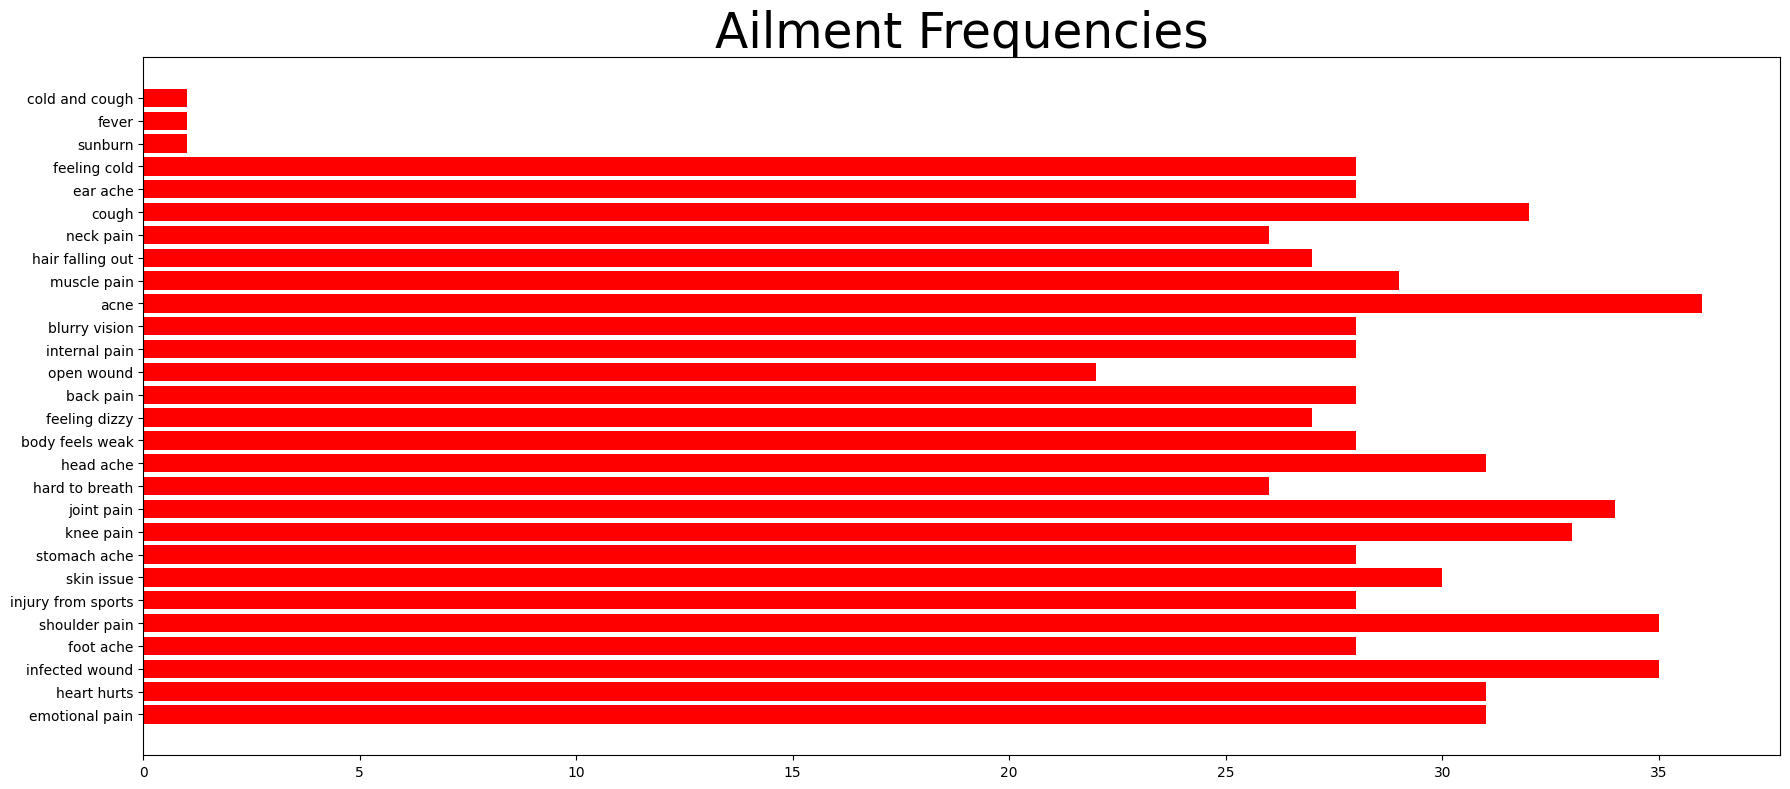

In [14]:
plt.figure(figsize = (18,8))
plt.title("Ailment Frequencies",fontsize=35)
plt.barh(color = 'Red',y=[i for i in range(len(list(ailments)))], width = list(dict_ail.values()),tick_label = list(dict_ail.keys()))
plt.tight_layout()

In [15]:
Cv = CountVectorizer(stop_words='english',ngram_range = (1,3), max_df=0.7)
transformed_count = Cv.fit_transform(data['stemmed_phrase'])

In [16]:
TfIdf = TfidfVectorizer(stop_words = 'english', ngram_range= (1,3),max_df= 0.7)
transformed_idf = TfIdf.fit_transform(data['stemmed_phrase'])

In [17]:
input_text = ['I am experiencing pain in the leg from the past two days']
trial = TfIdf.transform(input_text)

In [18]:
trial

<1x4970 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [19]:
ailment_dict

{0: 'emotional pain',
 1: 'heart hurts',
 2: 'infected wound',
 3: 'foot ache',
 4: 'shoulder pain',
 5: 'injury from sports',
 6: 'skin issue',
 7: 'stomach ache',
 8: 'knee pain',
 9: 'joint pain',
 10: 'hard to breath',
 11: 'head ache',
 12: 'body feels weak',
 13: 'feeling dizzy',
 14: 'back pain',
 15: 'open wound',
 16: 'internal pain',
 17: 'blurry vision',
 18: 'acne',
 19: 'muscle pain',
 20: 'hair falling out',
 21: 'neck pain',
 22: 'cough',
 23: 'ear ache',
 24: 'feeling cold',
 25: 'sunburn',
 26: 'fever',
 27: 'cold and cough'}

In [20]:
# the query is first processed and made into lower case
query = "From past few weeks feeling sad"

In [21]:
def process_query(query):
    # Change to lower
    query = query.lower()
    # Removed abbreviations
    res = ''
#     print(query.split())
    for k in query.split():
        if k in abbr_dict:
            print(abbr_dict[k])
            res+=' ' + abbr_dict[k]
        else:
            res+=' ' + k

    stemmer = SnowballStemmer('english')
    res = ' '.join([stemmer.stem(y) for y in res.split()])
    return res

In [22]:
print("Example query: ")
print("Final query:",process_query(query))
processed = process_query(query)

Example query: 
Final query: from past few week feel sad


In [23]:
query =[processed]
res = TfIdf.transform(query)
sim = cosine_similarity(res,transformed_idf)
res = list(np.argsort(sim))[0]
res = res[::-1][:3]

In [24]:
for k in res:
    print(data.loc[k]['Prompt'])

emotional pain
emotional pain
skin issue


In [25]:
def get_prediction(query):
    print("Query is :",query)
    processed = process_query(query)
    query = [processed]
    print("Processed :",query)
    res = TfIdf.transform(query)
    sim = cosine_similarity(res,transformed_idf)
    res = list(np.argsort(sim))[0]
    res = res[::-1][:20]
    print(sim[0][res[0]],sim[0][res[1]])
    ailment =[]
    # let's find most similar sentences and then see
    # use levenshtein distance after you have got the result
    for k in res[:1]:
        ailment.append(data.loc[k]['Prompt'])
    print("Results :")
    return ailment

In [26]:
for q in data['stemmed_phrase'][500:]:
    print(get_prediction(q))

Query is : my stomach feel full and upset and bloat after big meal
Processed : ['my stomach feel full and upset and bloat after big meal']
1.0000000000000002 0.15631720706831426
Results :
['stomach ache']
Query is : my mind feel veri sad as if it hurt the way i feel in my head is aw and when i think about my break-up i cri with sad
Processed : ['my mind feel veri sad as if it hurt the way i feel in my head is aw and when i think about my break-up i cri with sad']
1.0000000000000002 0.30769684560534594
Results :
['emotional pain']
Query is : i have a head pain everi singl day
Processed : ['i have a head pain everi singl day']
1.0000000000000002 0.19773183226222532
Results :
['internal pain']
Query is : my heart feel like it is go to explod
Processed : ['my heart feel like it is go to explod']
1.0000000000000002 0.26650915481854837
Results :
['heart hurts']
Query is : my shoulder hurt when i tri to reach someth abov my head
Processed : ['my shoulder hurt when i tri to reach someth abov m

In [27]:
model = RandomForestClassifier(n_estimators=100,min_samples_leaf=2,bootstrap=True)

In [28]:
data[:3]

,Phrase,Prompt,stemmed_phrase
0,when i remember her i feel down,emotional pain,when i rememb her i feel down
1,there is too much pain when i move my arm,heart hurts,there is too much pain when i move my arm
2,my son had his lip pierced and it is swollen a...,infected wound,my son had his lip pierc and it is swollen and...


In [29]:
TfIdf = TfidfVectorizer(stop_words = 'english', ngram_range= (1,3),max_df= 0.7)
X = TfIdf.fit_transform(data['stemmed_phrase']).toarray()

In [30]:
ailment_dict

{0: 'emotional pain',
 1: 'heart hurts',
 2: 'infected wound',
 3: 'foot ache',
 4: 'shoulder pain',
 5: 'injury from sports',
 6: 'skin issue',
 7: 'stomach ache',
 8: 'knee pain',
 9: 'joint pain',
 10: 'hard to breath',
 11: 'head ache',
 12: 'body feels weak',
 13: 'feeling dizzy',
 14: 'back pain',
 15: 'open wound',
 16: 'internal pain',
 17: 'blurry vision',
 18: 'acne',
 19: 'muscle pain',
 20: 'hair falling out',
 21: 'neck pain',
 22: 'cough',
 23: 'ear ache',
 24: 'feeling cold',
 25: 'sunburn',
 26: 'fever',
 27: 'cold and cough'}

In [31]:
# ailment_dict
ailment = {}
for i,j in ailment_dict.items():
    ailment[j] = i
print(ailment)
Y = data['Prompt'].map(ailment)

{'emotional pain': 0, 'heart hurts': 1, 'infected wound': 2, 'foot ache': 3, 'shoulder pain': 4, 'injury from sports': 5, 'skin issue': 6, 'stomach ache': 7, 'knee pain': 8, 'joint pain': 9, 'hard to breath': 10, 'head ache': 11, 'body feels weak': 12, 'feeling dizzy': 13, 'back pain': 14, 'open wound': 15, 'internal pain': 16, 'blurry vision': 17, 'acne': 18, 'muscle pain': 19, 'hair falling out': 20, 'neck pain': 21, 'cough': 22, 'ear ache': 23, 'feeling cold': 24, 'sunburn': 25, 'fever': 26, 'cold and cough': 27}


In [32]:
Y

0       0
1       1
2       2
3       2
4       3
       ..
735     0
736    16
737     0
738    12
739    11
Name: Prompt, Length: 740, dtype: int64

In [33]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 43, shuffle = True)

In [35]:
model.fit(X_train,Y_train)

RandomForestClassifier(min_samples_leaf=2)

In [36]:
y_preds = model.predict(X_test)

In [37]:
correct,incorrect =0,0
for k,i in zip(y_preds,Y_test):
    if(k==i):
        correct+=1
    else:
        incorrect+=1

In [38]:
correct

102

In [39]:
incorrect

46

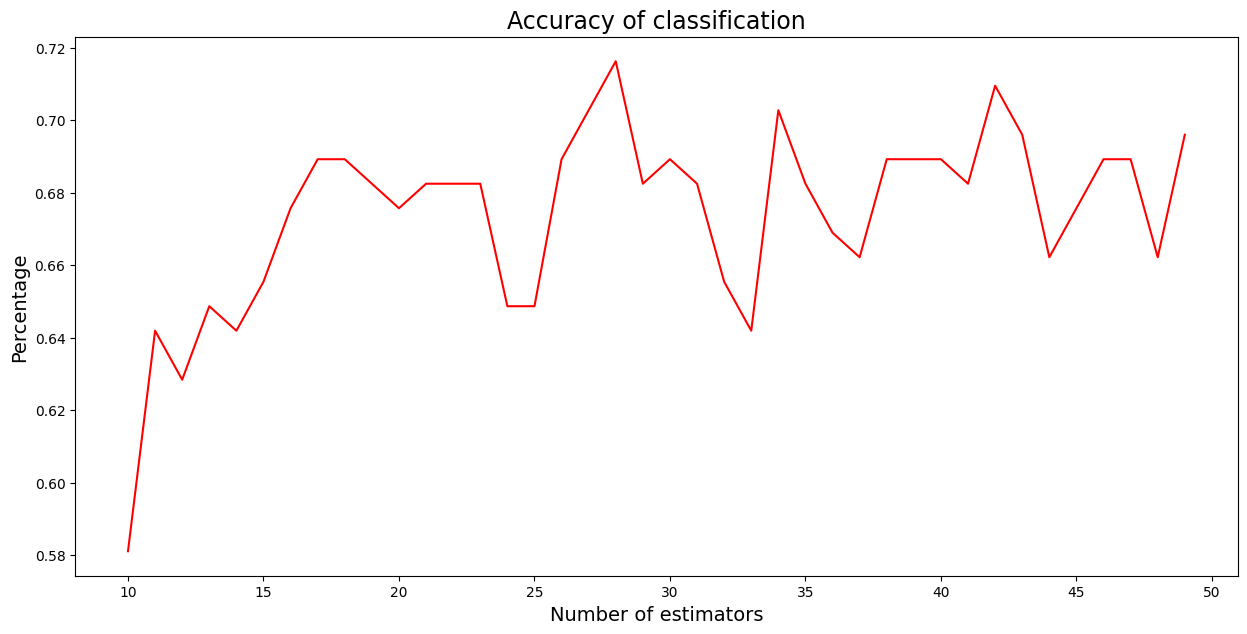

In [40]:
score =[]
for est in range(10,50):
    model = RandomForestClassifier(n_estimators=est,min_samples_leaf=2)
    model.fit(X_train,Y_train)
    s = model.score(X_test,Y_test)
    score.append(s)
plt.figure(figsize= (15,7))
plt.title("Accuracy of classification",fontsize=17)
plt.xlabel("Number of estimators",fontsize = 14)
plt.ylabel("Percentage",fontsize = 14)
plt.plot([i for i in range(10,50)],score,color= 'red')

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from nltk.stem import SnowballStemmer
import numpy as np

# Función para procesar la consulta
def process_query(query, abbr_dict):
    # Cambiar a minúsculas
    query = query.lower()

    # Reemplazar abreviaturas (si abbr_dict está definido)
    if abbr_dict:
        res = ' '.join(abbr_dict.get(k, k) for k in query.split())
    else:
        res = query

    # Aplicar stemming
    stemmer = SnowballStemmer('english')
    res = ' '.join([stemmer.stem(y) for y in res.split()])
    return res

# Supongamos que ya tienes el mejor modelo entrenado (model)
model = RandomForestClassifier(n_estimators=33, min_samples_leaf=2, bootstrap=True, max_features=300)
model.fit(X_train, Y_train)

# Ciclo para ingresar consultas
while True:
    user_input = input("Ingresa tu consulta (o escribe 'salir' para terminar): ")
    if user_input.lower() == 'salir':
        break

    # Procesar la consulta
    processed_query = process_query(user_input, abbr_dict)
    processed_query = [processed_query]

    # Transformar la consulta según el vectorizador (TfIdf)
    query_vectorized = TfIdf.transform(processed_query)

    # Predecir la clase de la consulta
    pred = model.predict_proba(query_vectorized)
    top_classes_indices = np.argsort(pred[0])[::-1][:3]  # Obtener los 3 mejores índices de clase
    top_classes = [ailment_dict[idx] for idx in top_classes_indices]  # Obtener las etiquetas de clase

    # Mostrar los resultados
    print("Consulta procesada:", processed_query[0])
    print("Clases predichas:", ', '.join(top_classes))

Ingresa tu consulta (o escribe 'salir' para terminar): My back hurts me and i can't bend it or walk
Consulta procesada: my back hurt me and i can not bend it or walk
Clases predichas: back pain, knee pain, foot ache
Ingresa tu consulta (o escribe 'salir' para terminar): I played sports in college then I had a cold and was sick all day
Consulta procesada: i play sport in colleg then i had a cold and was sick all day
Clases predichas: injury from sports, feeling cold, head ache
